In [22]:
#import all required files 
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Load and prepare data
data = pd.read_csv('Book1.csv')
X = np.array(data['Study_Time'],requires_grad=False)
y = np.array(data['Result_score'],requires_grad=False)
# y = data['Result_score'].values

In [36]:
# Normalize features (optional, but recommended)
X = (X-X.min())/(X.max()-X.min())
y = (y-y.min())/(y.max()-y.min())
# print(X)

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Define a 1-qubit quantum device
dev = qml.device("default.qubit", wires=1)

In [28]:
# Define a quantum circuit (ansatz)
@qml.qnode(dev)
def circuit(x, weights):
    qml.RX(x*np.pi, wires=0)
    qml.RY(weights[0], wires=0)
    return qml.expval(qml.PauliZ(0))

In [29]:
# Define a prediction function
def quantum_model(x, weights):
    return circuit(x, weights)

In [30]:
def cost(weights):
    preds=[quantum_model(x,weights) for x in X]
    return np.mean((y-preds)**2)

In [33]:
from pennylane.optimize import GradientDescentOptimizer
weights = np.array([0.1], requires_grad=True)
opt = GradientDescentOptimizer(0.1)

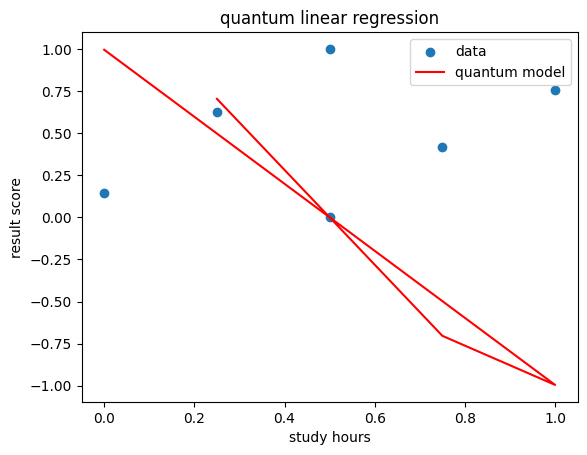

In [35]:
preds=[quantum_model(x,weights) for x in X]
plt.scatter(X,y,label="data")
plt.plot(X,preds,color="red",label="quantum model")
plt.xlabel("study hours")
plt.ylabel("result score")
plt.title("quantum linear regression")
plt.legend()
plt.show()

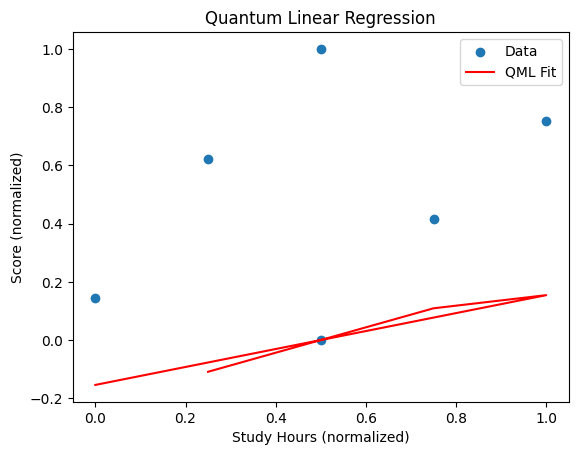

In [21]:
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('Book1.csv')
X_raw = np.array(data['Study_Time'],requires_grad=False)
Y_raw = np.array(data['Result_score'],requires_grad=False)
# Extract and normalize data
# X_raw = np.array(data["Hours"], )
# Y_raw = np.array(data["Score"], requires_grad=False)

# Normalize input and output
X = (X_raw - np.min(X_raw)) / (np.max(X_raw) - np.min(X_raw))
Y = (Y_raw - np.min(Y_raw)) / (np.max(Y_raw) - np.min(Y_raw))

# Setup quantum device
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit(x, weights):
    qml.RX(x * np.pi, wires=0)
    qml.RY(weights[0], wires=0)
    return qml.expval(qml.PauliZ(0))

def quantum_model(x, weights):
    return circuit(x, weights)

# Cost function
def cost(weights):
    preds = np.array([quantum_model(x, weights) for x in X])
    return np.mean((Y - preds) ** 2)

# Optimizer
from pennylane.optimize import GradientDescentOptimizer
weights = np.array([0.1], requires_grad=True)
opt = GradientDescentOptimizer(0.1)

# Training loop
for i in range(100):
    weights = opt.step(cost, weights)

# Predict
preds = [quantum_model(x, weights) for x in X]

# Plot
plt.scatter(X, Y, label="Data")
plt.plot(X, preds, color="red", label="QML Fit")
plt.xlabel("Study Hours (normalized)")
plt.ylabel("Score (normalized)")
plt.title("Quantum Linear Regression")
plt.legend()
plt.show()